In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.
/home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kate/anaconda3/en

In [2]:
vae = VAEUtils(directory='chemical_vae/models/zinc_properties')

From /home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
/home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From /home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/kate/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1156: calling reduce

Using standarized functions? True
Standarization: estimating mu and std values ...done!


In [3]:
def process(molecule):
    smiles = mu.canon_smiles(molecule)

    hot = vae.smiles_to_hot(smiles, canonize_smiles=True)
    encoded = vae.encode(hot)

    print('{:30s} : {}'.format('Input',smiles))
    print('{:30s} : {} with norm {:.3f}'.format('Encoded (Z representation)', encoded.shape, np.linalg.norm(encoded)))

    print('{:30s} : '.format('Decoded (several attempts)'))
    noise = 5.0
    decoded = vae.z_to_smiles(encoded, decode_attempts=100, noise_norm=noise)
    print('Found {:d} unique mols, out of {:d}'.format(len(set(decoded['smiles'])), sum(decoded['count'])))
    print('SMILES\n', decoded.smiles)
    display(PandasTools.FrameToGridImage(decoded, column='mol', legendsCol='smiles', molsPerRow=5))
    
    prop = vae.predict_prop_Z(encoded)[0]
    print('{:30s} : {}'.format('Properties (qed,SAS,logP)', prop))

Input                          : Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1
Encoded (Z representation)     : (1, 196) with norm 10.276
Decoded (several attempts)     : 
Found 8 unique mols, out of 15
SMILES
 0    Cc1ccc(S[N+]2=NC(=O)Nc3ccccc32)cc1
1    Cc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1
2    Cc1ccc(C[n+]2=NC(=O)Nc3ccccc32)cc1
3    Cc1ccc(-[n+]2=NC(=O)Nc3ccccc32)cc1
4    Fc1ccc(/[N+]2=NC(=O)Nc3ccccc32)cc1
5    Fc1ccc(C[n+]2=NC(=O)Nc3ccccc32)cc1
6    C1cccc(C[n+]2=NC(=O)Nc3ccccc32)cc1
7    C1cccc(C[N+]2=NC(=O)Nc3ccccc32)cc1
Name: smiles, dtype: object


RDKit ERROR: [21:02:33] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:02:33] SMILES Parse Error: syntax error while parsing: CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1
RDKit ERROR: [21:02:33] SMILES Parse Error: Failed parsing SMILES 'CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1' for input: 'CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1'
RDKit ERROR: [21:02:33] SMILES Parse Error: syntax error while parsing: Cc1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1
RDKit ERROR: [21:02:33] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1' for input: 'Cc1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1'
RDKit ERROR: [21:02:33] Explicit valence for atom # 7 O, 3, is greater than permitted
RDKit ERROR: [21:02:33] SMILES Parse Error: syntax error while parsing: C1cccc(C/N+]2=NC(=O)Nc3ccccc32)cc1
RDKit ERROR: [21:02:33] SMILES Parse Error: Failed parsing SMILES 'C1cccc(C/N+]2=NC(=O)Nc3ccccc32)cc1' for input: 'C1cccc(C/N+]2=NC(=O)Nc3ccccc32)cc1'
RDKit ERROR: [21:02:33] Explicit valence for atom # 1 

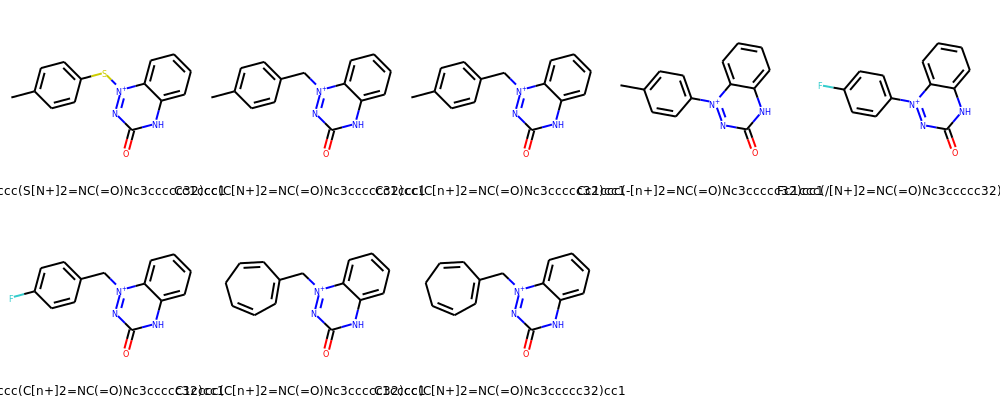

Properties (qed,SAS,logP)      : [0.72313255 2.4103725  3.1467233 ]


In [4]:
process('Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1')

Input                          : CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Encoded (Z representation)     : (1, 196) with norm 13.424
Decoded (several attempts)     : 
Found 2 unique mols, out of 2
SMILES
 0    CN(C1cccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
1    CN(C1cccc2c(c1)C(=O)CS2)C(=O)OC(C)(C)C
Name: smiles, dtype: object


RDKit ERROR: [21:02:35] SMILES Parse Error: syntax error while parsing: CN(C)c1cc2c(c1)C(=O)C@H2C(=O)OC(C)(C)C
RDKit ERROR: [21:02:35] SMILES Parse Error: Failed parsing SMILES 'CN(C)c1cc2c(c1)C(=O)C@H2C(=O)OC(C)(C)C' for input: 'CN(C)c1cc2c(c1)C(=O)C@H2C(=O)OC(C)(C)C'


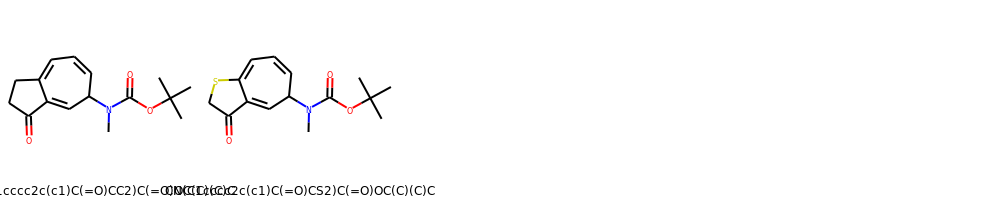

Properties (qed,SAS,logP)      : [0.81158835 2.2198553  2.4382763 ]


In [5]:
process('CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C')

Input                          : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Encoded (Z representation)     : (1, 196) with norm 13.128
Decoded (several attempts)     : 
Found 7 unique mols, out of 59
SMILES
 0    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
1    COC(=O)C1CCC(Nc2ccc(NC(=O)C(=O)NN)cn2)CC1
2     COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C1
3    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)nn2)CC1
4    COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1
5    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1
6    COC(=O)C1CC(CNc2ccc(NC(=O)C(=O)NC)cn2)CC1
Name: smiles, dtype: object


RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [21:02:38] SMILES Parse Error: syntax error while parsing: COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1
RDKit ERROR: [21:02:38] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1' for input: 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1'
RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 19 20 21
RDKit ERROR: 
RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [21:02:38] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 


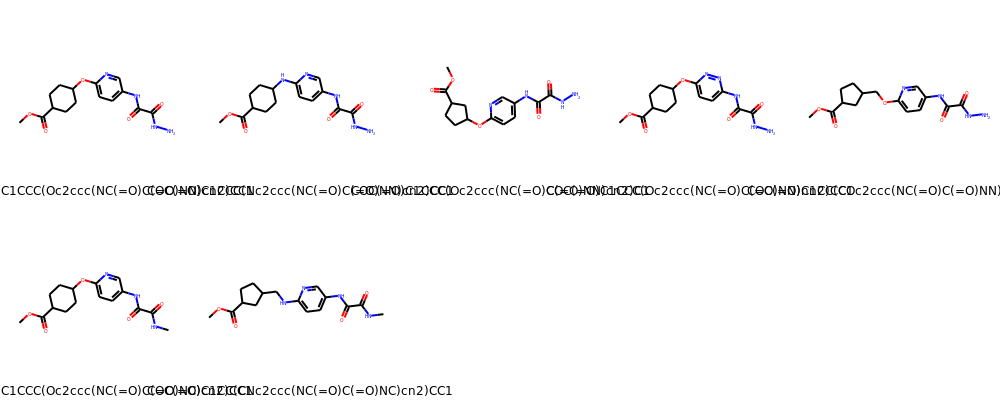

Properties (qed,SAS,logP)      : [0.7531525  2.4784982  0.05034626]


In [6]:
process('COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1')